<a href="https://colab.research.google.com/github/Pembo2008/Kaggle/blob/main/Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/salaries/ds_salaries.csv')

In [ ]:
data.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
data = data.drop(['Unnamed: 0','salary_in_usd'],axis='columns')

In [ ]:
for i in data.columns:
  print("%s"% i)
  print(data[i].value_counts())

work_year
2022    318
2021    217
2020     72
Name: work_year, dtype: int64
experience_level
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
employment_type
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer

In [ ]:
data = data.drop('employment_type',axis=1)

In [ ]:
data.head()

,work_year,experience_level,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,70000,EUR,DE,0,DE,L
1,2020,SE,Machine Learning Scientist,260000,USD,JP,0,JP,S
2,2020,SE,Big Data Engineer,85000,GBP,GB,50,GB,M
3,2020,MI,Product Data Analyst,20000,USD,HN,0,HN,S
4,2020,SE,Machine Learning Engineer,150000,USD,US,50,US,L


## Exploratoy analysis

In [ ]:
data.head()

,work_year,experience_level,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,70000,EUR,DE,0,DE,L
1,2020,SE,Machine Learning Scientist,260000,USD,JP,0,JP,S
2,2020,SE,Big Data Engineer,85000,GBP,GB,50,GB,M
3,2020,MI,Product Data Analyst,20000,USD,HN,0,HN,S
4,2020,SE,Machine Learning Engineer,150000,USD,US,50,US,L


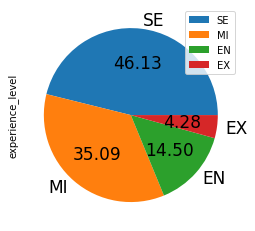

In [ ]:
vals = data.experience_level.value_counts()
vals.plot(kind='pie',fontsize=17, autopct='%.2f')
plt.legend()

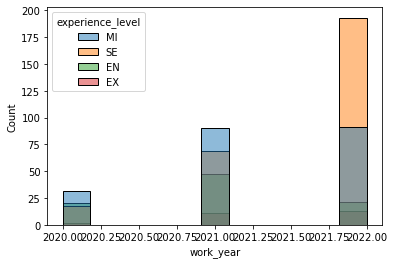

In [ ]:
sns.histplot(data = data, x = "work_year",hue = "experience_level")

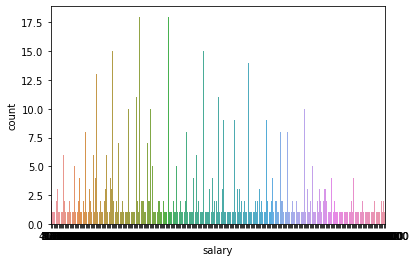

In [ ]:
sns.countplot(data = data, x = "salary")

<BarContainer object of 607 artists>

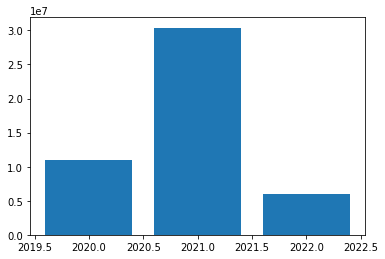

In [ ]:
plt.bar(data.work_year,data.salary)

<BarContainer object of 26 artists>

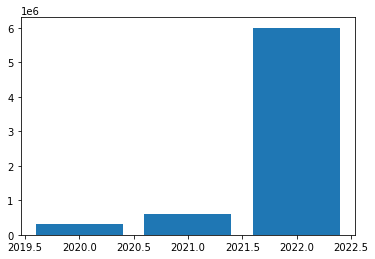

In [ ]:
plt.bar(data[data.experience_level == 'EX'].work_year,data[data.experience_level == 'EX'].salary)	

<BarContainer object of 213 artists>

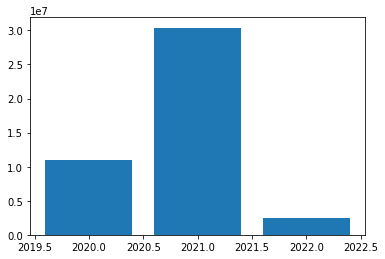

In [ ]:
plt.bar(data[data.experience_level == 'MI'].work_year,data[data.experience_level == 'MI'].salary)

<BarContainer object of 280 artists>

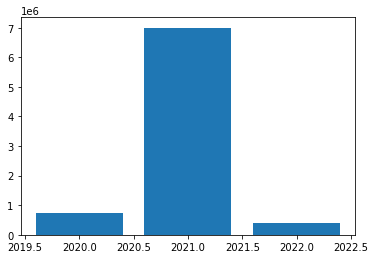

In [ ]:
plt.bar(data[data.experience_level == 'SE'].work_year,data[data.experience_level == 'SE'].salary)

<BarContainer object of 88 artists>

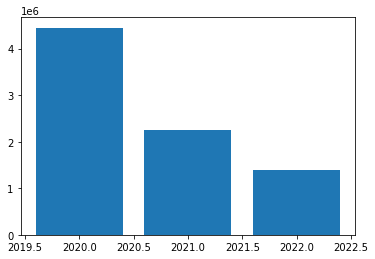

In [ ]:
plt.bar(data[data.experience_level == 'EN'].work_year,data[data.experience_level == 'EN'].salary)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[]

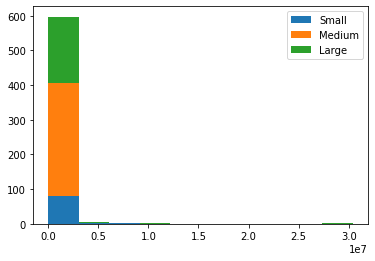

In [ ]:
plt.hist([data[data["company_size"] == 'S'].salary,data[data["company_size"] == 'M'].salary,data[data["company_size"] == 'L'].salary],stacked=True)
plt.legend(["Small","Medium","Large"])
plt.plot()

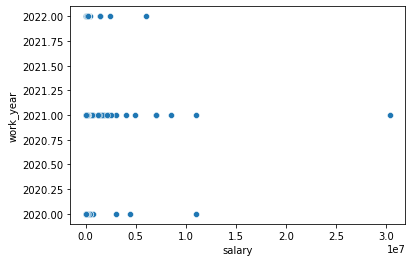

In [ ]:
sns.scatterplot(x=data.salary, y=data.work_year)

In [ ]:
import plotly.express as px
fig = px.histogram(data, x='job_title', color='work_year')
fig.show()

In [ ]:
fig = px.histogram(data, x='job_title', color='experience_level')
fig.show()

## Learning process

In [ ]:
data_obj = data.describe(include=['object'])
for i in data_obj.columns:
  labelencoder = LabelEncoder()
  data[i] = labelencoder.fit_transform(data[i])
  data[i] = data[i].astype(int)

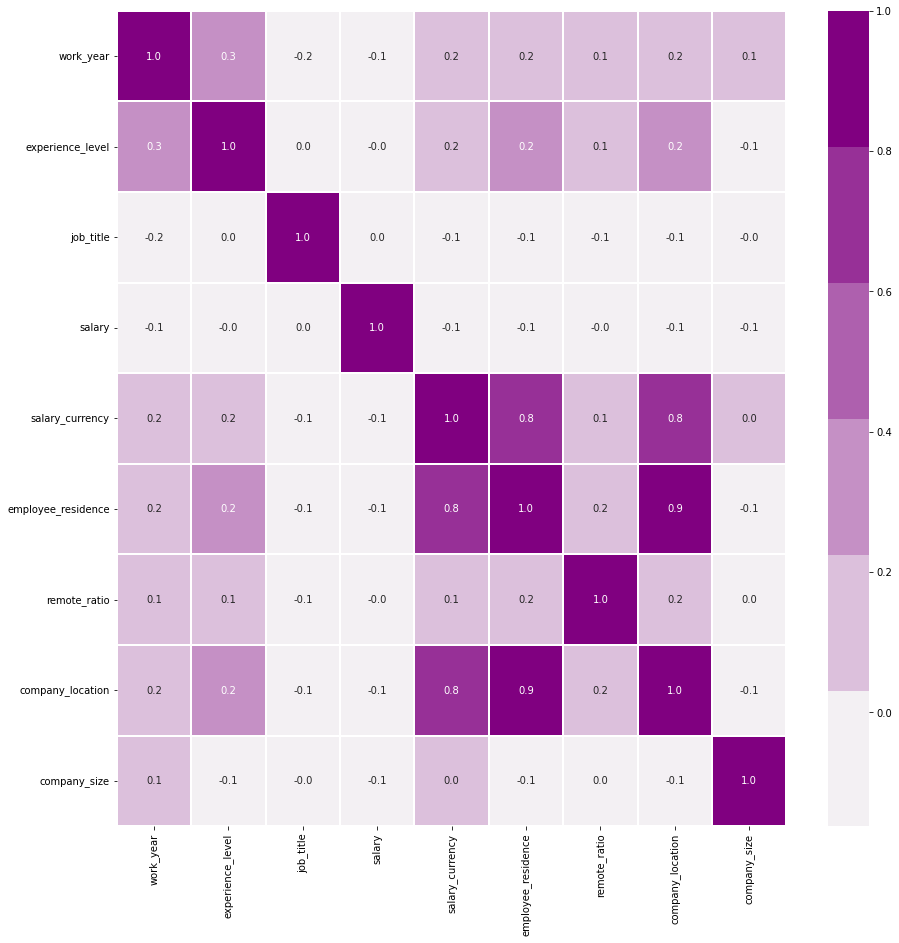

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.9, cmap=sns.light_palette("purple"))

In [ ]:
target = pd.DataFrame(data["salary"])

In [ ]:
data = data.drop(['salary','employee_residence','salary_currency'],axis='columns')

In [ ]:
data.head()

,work_year,experience_level,job_title,remote_ratio,company_location,company_size
0,2020,2,22,0,12,0
1,2020,3,41,0,29,2
2,2020,3,7,50,18,1
3,2020,2,47,0,20,2
4,2020,3,38,50,48,0


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=17
)

In [ ]:
x_train.shape, x_test.shape

((424, 6), (183, 6))

In [ ]:
from keras import layers
model = keras.Sequential([
     layers.Dense(512,input_shape = [6],activation='relu'),
     layers.BatchNormalization(),
     layers.Dropout(0.3),
     layers.Dense(256,activation='relu'),
     layers.BatchNormalization(),
     layers.Dropout(0.3),
     layers.Dense(128,activation='relu'),
     layers.BatchNormalization(),
     layers.Dropout(0.3),
     layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics = "mean_squared_error"
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)
history = model.fit(
    x_train,
    y_train,
    epochs = 50,
    batch_size = 64,
    verbose=1, 
    shuffle=True,
    validation_split= 0.3
)

Epoch 1/50
5/5 [==============================] - 2s 62ms/step - loss: 1534161977344.0000 - mean_squared_error: 1534161977344.0000 - val_loss: 7385490915328.0000 - val_mean_squared_error: 7385490915328.0000
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 1534161321984.0000 - mean_squared_error: 1534161321984.0000 - val_loss: 7385564839936.0000 - val_mean_squared_error: 7385564839936.0000
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 1534160797696.0000 - mean_squared_error: 1534160797696.0000 - val_loss: 7385616220160.0000 - val_mean_squared_error: 7385616220160.0000
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 1534159749120.0000 - mean_squared_error: 1534159749120.0000 - val_loss: 7385659211776.0000 - val_mean_squared_error: 7385659211776.0000
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 1534159355904.0000 - mean_squared_error: 1534159355904.0000 - val_loss: 7385692241920.0000 - val_mean

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def calc_metrics(true, pred):
    mse = metrics.mean_squared_error(true, pred)

    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(true, pred)

    medae = metrics.median_absolute_error(true, pred)

    R2 = metrics.r2_score(true, pred)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
val = lr.predict(x_test)
calc_metrics(val,y_test)

MSE:   611476472477.7157
RMSE:  781969.6109681729
R2:    -6.5987055089644215
MAE:   361276.66264420387
MedAE: 220136.95734781027


In [ ]:
from sklearn import linear_model
ridgeModel = linear_model.Ridge(alpha=0)
ridgeModel.fit(x_train, y_train)

Ridge(alpha=0)

In [ ]:
val = ridgeModel.predict(x_test)
calc_metrics(val,y_test)

MSE:   611476472477.7198
RMSE:  781969.6109681756
R2:    -6.598705508964132
MAE:   361276.66264420847
MedAE: 220136.95734781027


In [ ]:
ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')

In [ ]:
ridgeModel.fit(x_train, y_train)

RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8...
       23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
       24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
       25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
       26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4,
       27.5, 27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5,
       28.6, 28.7, 28.8, 28.9, 29. , 29.1, 29.2, 29.3,

In [ ]:
ridgeModel.alpha_

29.900000000000002

In [ ]:
ridgeModel.best_score_*-1

1469412.892785363

In [ ]:
ridgeModel = linear_model.Ridge(alpha=29.9)
ridgeModel.fit(x_train, y_train)
val = ridgeModel.predict(x_test)
calc_metrics(val,y_test)

MSE:   600006938817.8223
RMSE:  774601.1482161786
R2:    -7.852009679968848
MAE:   350949.35305719165
MedAE: 198368.64830201864


In [ ]:
lassoModel = linear_model.LassoCV(alphas=np.arange(0.1, 10, 0.1), 
                                  normalize=True,
                                  cv=5)
lassoModel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=5, normalize=True)

In [ ]:
lassoModel.alpha_

9.9

In [ ]:
lassoModel = linear_model.Lasso(alpha=9.9)
lassoModel.fit(x_train,y_train)
val = lassoModel.predict(x_test)
calc_metrics(val,y_test)

MSE:   611466283460.6307
RMSE:  781963.0959710508
R2:    -6.599470900247186
MAE:   361269.1659454065
MedAE: 220111.19132858515


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, target, test_size=0.3, random_state=17
)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(x_train)

poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

print('Original number of features:', x_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 6
Number of features after polynomial transformation: 27


In [ ]:
regressionModel = linear_model.LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)
print('Train:')
calc_metrics(y_train, regressionModel.predict(poly_train))

print('\nTest:')
calc_metrics(y_test, regressionModel.predict(poly_test))

Train:
MSE:   2949067755938.9507
RMSE:  1717284.9955493556
R2:    0.06938873191764405
MAE:   534827.1970810994
MedAE: 224045.82322167614

Test:
MSE:   718208503749.3168
RMSE:  847471.8306523921
R2:    -0.31987673824563845
MAE:   456308.76548659115
MedAE: 241732.88152692624


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


### KNN

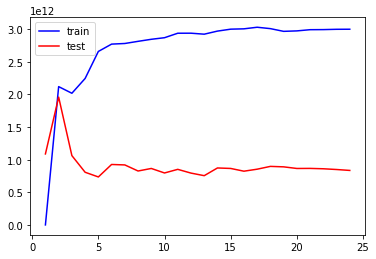

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
neighbors = range(1, 25,1)
errors_train = []
errors_test = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    errors_train.append(mean_squared_error(knn.predict(x_train), y_train))
    errors_test.append(mean_squared_error(knn.predict(x_test), y_test))
    pass
    
plt.plot(neighbors, errors_train, color='blue', label='train')
plt.plot(neighbors, errors_test, color='red', label='test')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_gr = KNeighborsRegressor()
param_gridsearch = {'n_neighbors': np.arange(1,15),
                    'weights':['uniform','distance'],
                    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'metric':['canberra', 'chebyshev','hamming', 'jaccard','minkowski','manhattan'],
                    'leaf_size':list(range(10,50,10))
                   }
knn_gridsearch = GridSearchCV(knn_gr,param_gridsearch,scoring = 'neg_root_mean_squared_error')
knn_gridsearch.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40],
                         'metric': ['canberra', 'chebyshev', 'hamming',
                                    'jaccard', 'minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [ ]:
print("Best score: "+ str(-1*knn_gridsearch.best_score_))

Best score: 1417305.4191545614


In [ ]:
print("Best parameters: " + str(knn_gridsearch.best_params_))

Best parameters: {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'jaccard', 'n_neighbors': 12, 'weights': 'uniform'}


In [ ]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsRegressor(algorithm= 'brute', metric= 'jaccard',leaf_size= 10, n_neighbors= 12, weights= 'uniform')
knn.fit(x_train, y_train)
calc_metrics(y_test, knn.predict(x_test))

MSE:   547716925776.0255
RMSE:  740078.9996858616
R2:    -0.006558437697802955
MAE:   192400.0
MedAE: 75266.66666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


### DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
dt = DecisionTreeRegressor()
param = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter':['best', 'random'],
         'max_depth': list(range(2,15)), 
         'min_samples_split': range(2, 11, 2)}
dt_cv = RandomizedSearchCV(dt, param,scoring='neg_mean_squared_error',n_iter=250)
dt_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=250,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'min_samples_split': range(2, 11, 2),
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [ ]:
dt_cv.best_score_*-1

3068561827786.2563

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state= 17, n_jobs=-1)

parameters = {'n_estimators': range(5, 18), 
              'max_depth': list(range(2,12)),
              'criterion': ['mse', 'mae'],
             }
rf_cv = RandomizedSearchCV(rf, parameters,scoring='neg_mean_squared_error',n_iter=250)
rf_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` 

In [ ]:
rf_cv.best_score_*-1